In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matplotlib.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']
df1 = pd.read_csv('games.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [4]:
df1.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [5]:
df2 = pd.read_csv('recommendations.csv')

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 2.2+ GB


In [7]:
df2.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4


In [8]:
df2 = df2.drop(columns = ['helpful', 'funny', 'date', 'hours', 'user_id', 'review_id'])

In [9]:
df2.head()

,app_id,is_recommended
0,975370,True
1,304390,False
2,1085660,True
3,703080,True
4,526870,True


# Checked data structure and data types.

In [10]:
df1['date_release']= pd.to_datetime(df1['date_release'])

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app_id          50872 non-null  int64         
 1   title           50872 non-null  object        
 2   date_release    50872 non-null  datetime64[ns]
 3   win             50872 non-null  bool          
 4   mac             50872 non-null  bool          
 5   linux           50872 non-null  bool          
 6   rating          50872 non-null  object        
 7   positive_ratio  50872 non-null  int64         
 8   user_reviews    50872 non-null  int64         
 9   price_final     50872 non-null  float64       
 10  price_original  50872 non-null  float64       
 11  discount        50872 non-null  float64       
 12  steam_deck      50872 non-null  bool          
dtypes: bool(4), datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 3.7+ MB


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 2 columns):
 #   Column          Dtype
---  ------          -----
 0   app_id          int64
 1   is_recommended  bool 
dtypes: bool(1), int64(1)
memory usage: 353.2 MB


# Converted date from object data type to datetime.

In [13]:
df1.isnull().sum()

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

In [14]:
df1.isna().sum()

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

In [15]:
df2.isnull().sum()

app_id            0
is_recommended    0
dtype: int64

In [16]:
df1.duplicated().sum()

np.int64(0)

In [17]:
df2.duplicated().sum()

np.int64(41083404)

# No null or duplicated data found.

In [18]:
df1['month_released'] = df1['date_release'].dt.month
df1['month_released']

0        11
1         8
2         4
3        11
4        10
         ..
50867     9
50868     9
50869     9
50870    10
50871    10
Name: month_released, Length: 50872, dtype: int32

In [19]:
df1['year_released'] = df1['date_release'].dt.year
df1['year_released']

0        2008
1        2011
2        2013
3        2014
4        2014
         ... 
50867    2023
50868    2023
50869    2023
50870    2023
50871    2023
Name: year_released, Length: 50872, dtype: int32

# New columns containing only month and year of release of the game. 

In [20]:
app_review_count = df2.groupby('app_id').size().reset_index(name='review_count')

In [21]:
app_recommended_count = df2.groupby('app_id')['is_recommended'].sum().reset_index(name='recommended_count')

In [22]:
app_recommended_count = app_recommended_count.sort_values(by = 'recommended_count', ascending = False)

In [23]:
app_review_count = app_review_count.sort_values(by = 'review_count', ascending = False)

In [24]:
app_review_count.head()

,app_id,review_count
18,440,319492
2032,252490,270684
22338,1091500,226414
24,730,219737
21,570,216914


In [25]:
app_recommended_count.head()

,app_id,recommended_count
18,440,294879
2032,252490,226293
2962,292030,193139
7164,431960,186792
24,730,186306


In [26]:
recommended_app = pd.merge(app_recommended_count, df1, on = 'app_id')[:20]

In [27]:
recommended_app.head(20)

,app_id,recommended_count,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,month_released,year_released
0,440,294879,Team Fortress 2,2007-10-10,True,True,True,Very Positive,93,985819,0.0,0.0,0.0,True,10,2007
1,252490,226293,Rust,2018-02-08,True,True,False,Very Positive,87,786668,40.0,0.0,0.0,True,2,2018
2,292030,193139,The Witcher® 3: Wild Hunt,2015-05-18,True,False,False,Overwhelmingly Positive,96,668455,40.0,0.0,0.0,True,5,2015
3,431960,186792,Wallpaper Engine,2018-11-01,True,False,False,Overwhelmingly Positive,98,637341,4.0,0.0,0.0,True,11,2018
4,730,186306,Counter-Strike: Global Offensive,2012-08-21,True,True,True,Very Positive,88,7494460,15.0,0.0,0.0,True,8,2012
5,374320,176742,DARK SOULS™ III,2016-04-11,True,False,False,Very Positive,94,230407,30.0,0.0,0.0,True,4,2016
6,550,172579,Left 4 Dead 2,2009-11-16,True,True,True,Overwhelmingly Positive,97,574470,10.0,0.0,0.0,True,11,2009
7,570,171841,Dota 2,2013-07-09,True,True,True,Very Positive,82,2045628,0.0,0.0,0.0,True,7,2013
8,227300,171590,Euro Truck Simulator 2,2012-10-12,True,True,True,Overwhelmingly Positive,97,494214,20.0,0.0,0.0,True,10,2012
9,444090,171516,Paladins®,2018-05-08,True,True,False,Very Positive,85,339466,0.0,0.0,0.0,True,5,2018


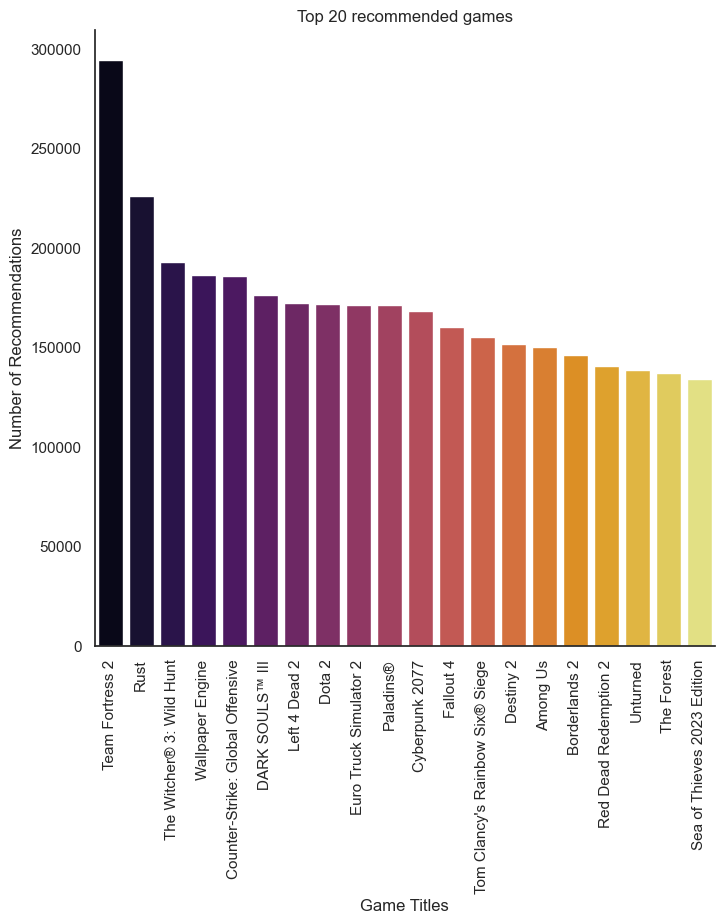

In [28]:
sns.set(style="white", context="notebook")
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(recommended_app, x = "title", y = "recommended_count", hue = "title", legend = False, palette="inferno", ax=ax)
ax.set_title("Top 20 recommended games")
ax.set_ylabel("Number of Recommendations")
ax.set_xlabel("Game Titles")
plt.xticks(rotation=90)
sns.despine()
plt.show()

# Got the number of reviews and recommendation count for each app in sorted (descending) order.

In [29]:
df1 = df1.sort_values(by = ['user_reviews', 'positive_ratio'], ascending = False)

In [30]:
df1.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,month_released,year_released
14398,730,Counter-Strike: Global Offensive,2012-08-21,True,True,True,Very Positive,88,7494460,15.0,0.0,0.0,True,8,2012
47770,578080,PUBG: BATTLEGROUNDS,2017-12-21,True,False,False,Mixed,57,2217226,0.0,0.0,0.0,True,12,2017
13176,570,Dota 2,2013-07-09,True,True,True,Very Positive,82,2045628,0.0,0.0,0.0,True,7,2013
12717,271590,Grand Theft Auto V,2015-04-13,True,False,False,Very Positive,86,1484122,0.0,0.0,0.0,True,4,2015
14535,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,True,False,False,Very Positive,86,993312,20.0,0.0,0.0,True,12,2015
47380,440,Team Fortress 2,2007-10-10,True,True,True,Very Positive,93,985819,0.0,0.0,0.0,True,10,2007
13035,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,943413,10.0,0.0,0.0,True,5,2011
15363,4000,Garry's Mod,2006-11-29,True,True,True,Overwhelmingly Positive,96,853733,10.0,0.0,0.0,True,11,2006
13173,252490,Rust,2018-02-08,True,True,False,Very Positive,87,786668,40.0,0.0,0.0,True,2,2018
14376,1172470,Apex Legends™,2020-11-04,True,False,False,Very Positive,80,713182,0.0,0.0,0.0,True,11,2020


In [31]:
df1 = df1.drop(columns = ['price_final', 'price_original', 'discount'])

In [32]:
all_time_popular = df1.sort_values(by = 'user_reviews', ascending = True).tail(20)
all_time_popular

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,steam_deck,month_released,year_released
14459,413150,Stardew Valley,2016-02-26,True,True,True,Overwhelmingly Positive,98,505882,True,2,2016
47637,304930,Unturned,2017-07-07,True,True,True,Very Positive,91,515016,True,7,2017
14453,1245620,ELDEN RING,2022-02-24,True,False,False,Very Positive,92,528702,True,2,2022
14457,230410,Warframe,2013-03-25,True,False,False,Very Positive,86,542198,True,3,2013
14163,1091500,Cyberpunk 2077,2020-12-09,True,False,False,Very Positive,80,557051,True,12,2020
13273,1085660,Destiny 2,2019-10-01,True,False,False,Very Positive,81,562723,True,10,2019
12711,550,Left 4 Dead 2,2009-11-16,True,True,True,Overwhelmingly Positive,97,574470,True,11,2009
50781,945360,Among Us,2018-11-16,True,False,False,Very Positive,92,587821,True,11,2018
47791,431960,Wallpaper Engine,2018-11-01,True,False,False,Overwhelmingly Positive,98,637341,True,11,2018
12800,292030,The Witcher® 3: Wild Hunt,2015-05-18,True,False,False,Overwhelmingly Positive,96,668455,True,5,2015


<function matplotlib.pyplot.show(close=None, block=None)>

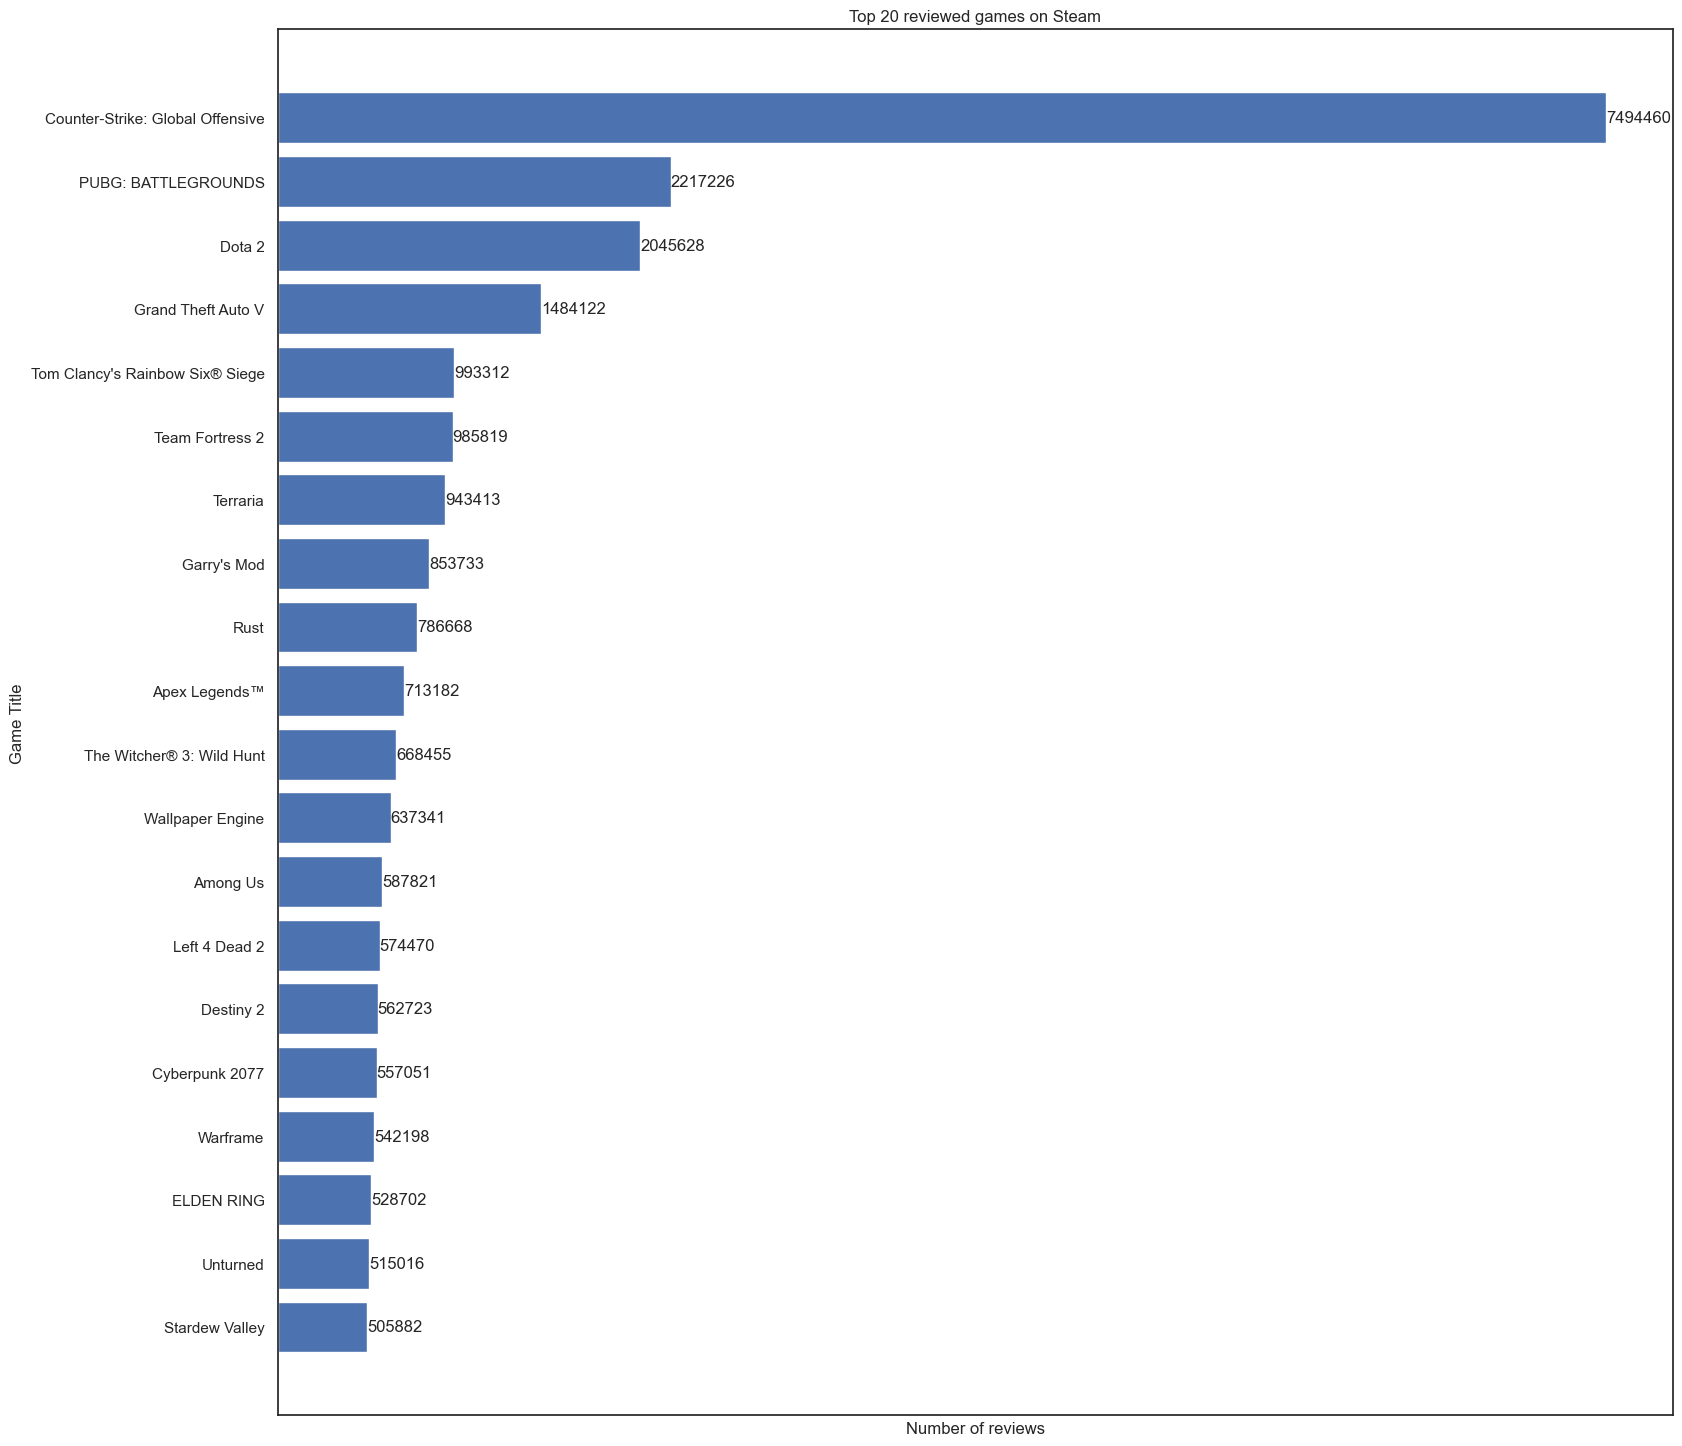

In [33]:
plt.figure(figsize=(18, 18))
bars = plt.barh(all_time_popular['title'], all_time_popular['user_reviews'])
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='left', va='center')
plt.title("Top 20 reviewed games on Steam")
plt.xticks([])
plt.ylabel("Game Title")
plt.xlabel("Number of reviews")
plt.show

In [34]:
win_top = df1[df1['win'] == True & (df1['positive_ratio'] >= 90) & (df1['rating'] == 'Overwhelmingly Positive')]
win_top = win_top.head(20)
win_top

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,steam_deck,month_released,year_released
13035,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,943413,True,5,2011
15363,4000,Garry's Mod,2006-11-29,True,True,True,Overwhelmingly Positive,96,853733,True,11,2006
12800,292030,The Witcher® 3: Wild Hunt,2015-05-18,True,False,False,Overwhelmingly Positive,96,668455,True,5,2015
47791,431960,Wallpaper Engine,2018-11-01,True,False,False,Overwhelmingly Positive,98,637341,True,11,2018
12711,550,Left 4 Dead 2,2009-11-16,True,True,True,Overwhelmingly Positive,97,574470,True,11,2009
14459,413150,Stardew Valley,2016-02-26,True,True,True,Overwhelmingly Positive,98,505882,True,2,2016
47538,227300,Euro Truck Simulator 2,2012-10-12,True,True,True,Overwhelmingly Positive,97,494214,True,10,2012
13203,739630,Phasmophobia,2020-09-18,True,False,False,Overwhelmingly Positive,96,486466,True,9,2020
11718,242760,The Forest,2018-04-30,True,False,False,Overwhelmingly Positive,95,416113,True,4,2018
48183,892970,Valheim,2021-02-02,True,False,True,Overwhelmingly Positive,95,356617,True,2,2021


In [35]:
mac_top = df1[(df1['mac'] == True) & (df1['positive_ratio'] >= 90) & (df1['rating'] == 'Overwhelmingly Positive') ]
mac_top = mac_top.head(20)

In [36]:
linux_top = df1[(df1['linux'] == True)  & (df1['positive_ratio'] >= 90) & (df1['rating'] == 'Overwhelmingly Positive')]
linux_top = linux_top.head(20)

In [37]:
deck_top = df1[df1['steam_deck'] == True & (df1['positive_ratio'] >= 90) & (df1['rating'] == 'Overwhelmingly Positive')]
deck_top = deck_top.head(20)

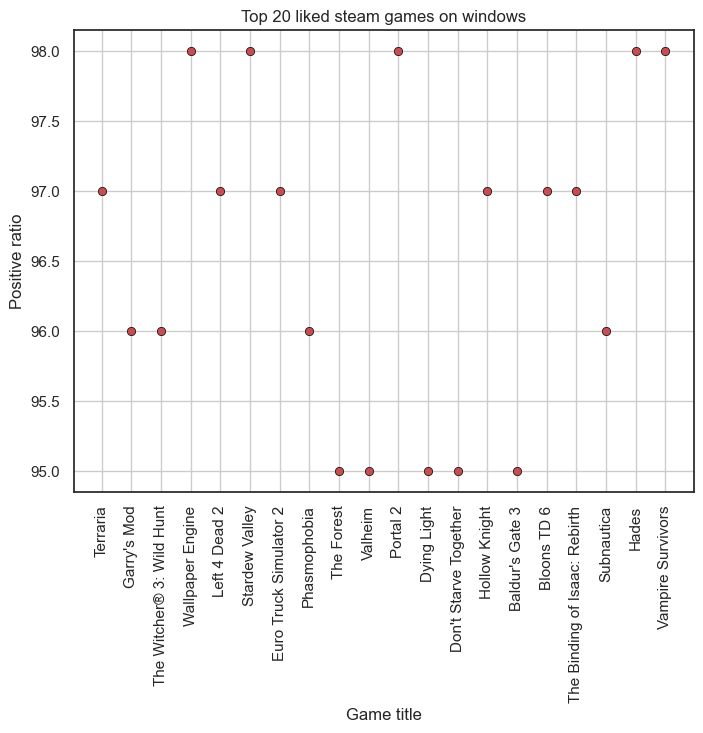

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(
    win_top['title'],
    win_top['positive_ratio'],
    marker='o',
    edgecolors='black',
    linewidths=0.5,
    color = 'r'
)
plt.xticks(rotation=90)
plt.title("Top 20 liked steam games on windows")
plt.xlabel("Game title")
plt.ylabel("Positive ratio")
plt.grid(True)
plt.show()

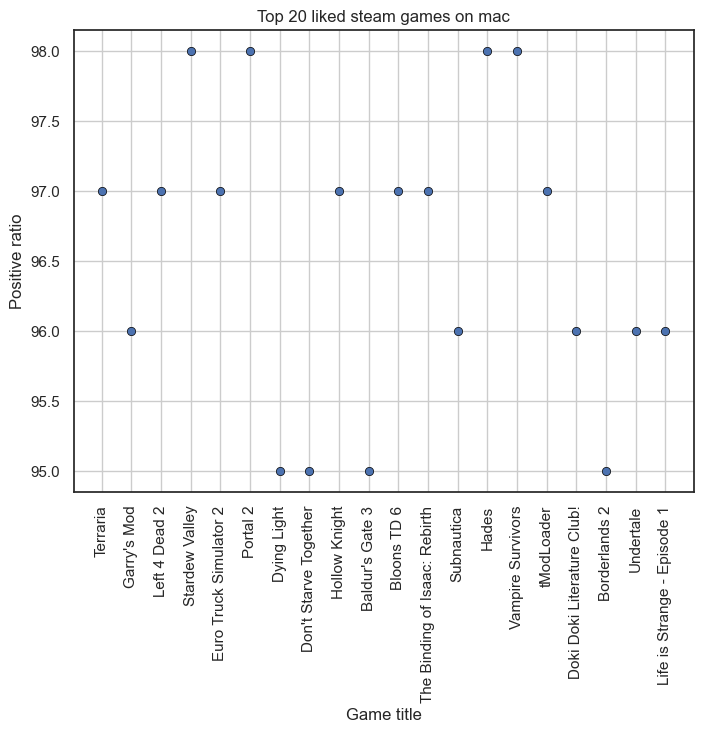

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(
    mac_top['title'],
    mac_top['positive_ratio'],
    marker='o',
    edgecolors='black',
    linewidths=0.5,
    color = 'b'
)
plt.xticks(rotation=90)
plt.title("Top 20 liked steam games on mac")
plt.xlabel("Game title")
plt.ylabel("Positive ratio")
plt.grid(True)
plt.show()

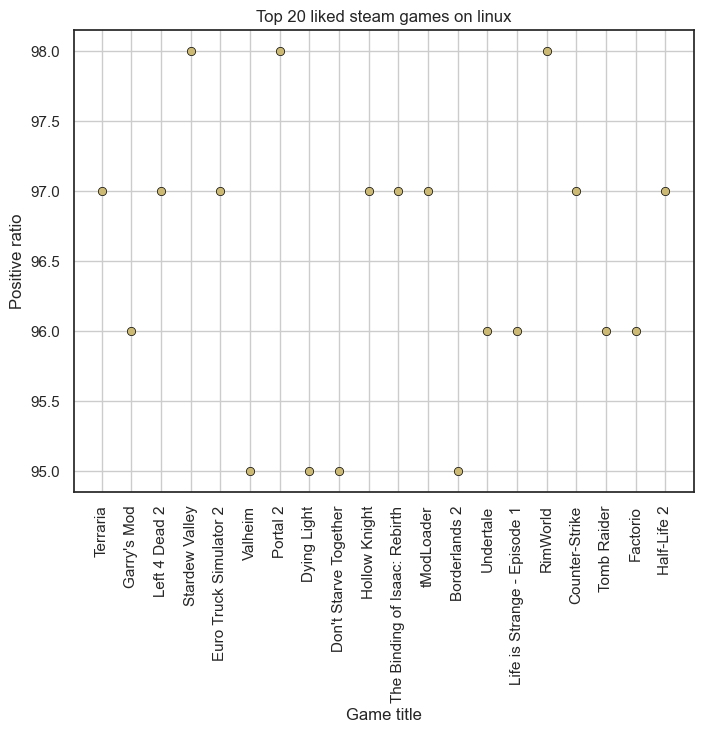

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(
    linux_top['title'],
    linux_top['positive_ratio'],
    marker='o',
    edgecolors='black',
    linewidths=0.5,
    color = 'y'
)
plt.xticks(rotation=90)
plt.title("Top 20 liked steam games on linux")
plt.xlabel("Game title")
plt.ylabel("Positive ratio")
plt.grid(True)
plt.show()

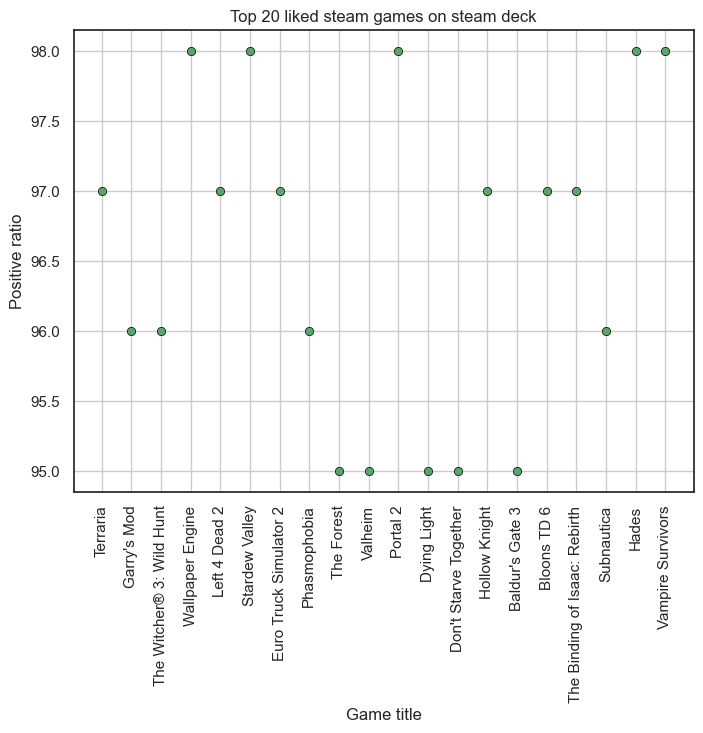

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(
    deck_top['title'],
    deck_top['positive_ratio'],
    marker='o',
    edgecolors='black',
    linewidths=0.5,
    color = 'g'
)
plt.xticks(rotation=90)
plt.title("Top 20 liked steam games on steam deck")
plt.xlabel("Game title")
plt.ylabel("Positive ratio")
plt.grid(True)
plt.show()

# Sorted games by liking and system compatibility

In [42]:
release_month_count = df1.groupby('month_released').size().reset_index(name = 'games_released')

In [43]:
release_month_count = release_month_count.sort_values(by = 'month_released', ascending = True)

In [44]:
release_month_count.head(12)

,month_released,games_released
0,1,3683
1,2,4058
2,3,4584
3,4,4342
4,5,4586
5,6,4062
6,7,3907
7,8,4206
8,9,4348
9,10,4704


In [45]:
release_year_count = df1.groupby('year_released').size().reset_index(name = 'games_released')

In [46]:
release_year_count = release_year_count.sort_values(by = 'year_released', ascending = True)

In [47]:
release_year_count = release_year_count.tail(20).reset_index()
release_year_count

,index,year_released,games_released
0,7,2004,4
1,8,2005,3
2,9,2006,56
3,10,2007,82
4,11,2008,146
5,12,2009,322
6,13,2010,284
7,14,2011,376
8,15,2012,565
9,16,2013,822


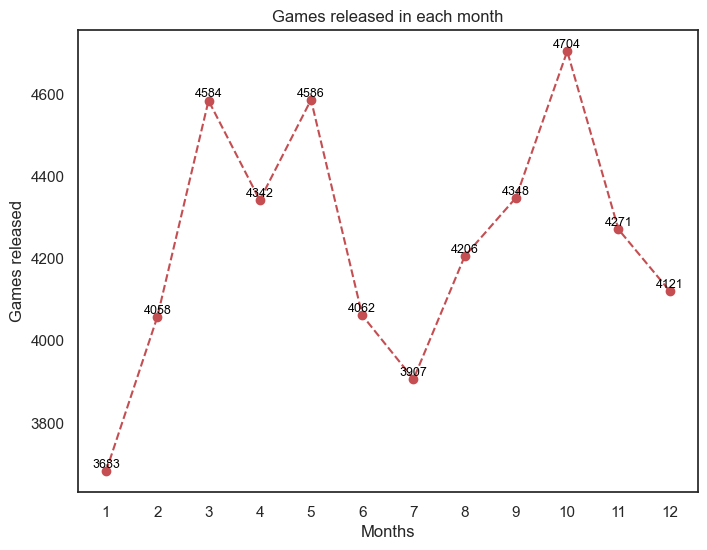

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(release_month_count['month_released'], release_month_count['games_released'], 'r--o')
for i in range(12):
    plt.text(release_month_count['month_released'][i], release_month_count['games_released'][i] + 0.5, f'{release_month_count['games_released'][i]}',
    ha='center', va='bottom', fontsize=9, color='black')
plt.title("Games released in each month")
plt.xticks(release_month_count['month_released'])
plt.xlabel("Months")
plt.ylabel("Games released")
plt.show()

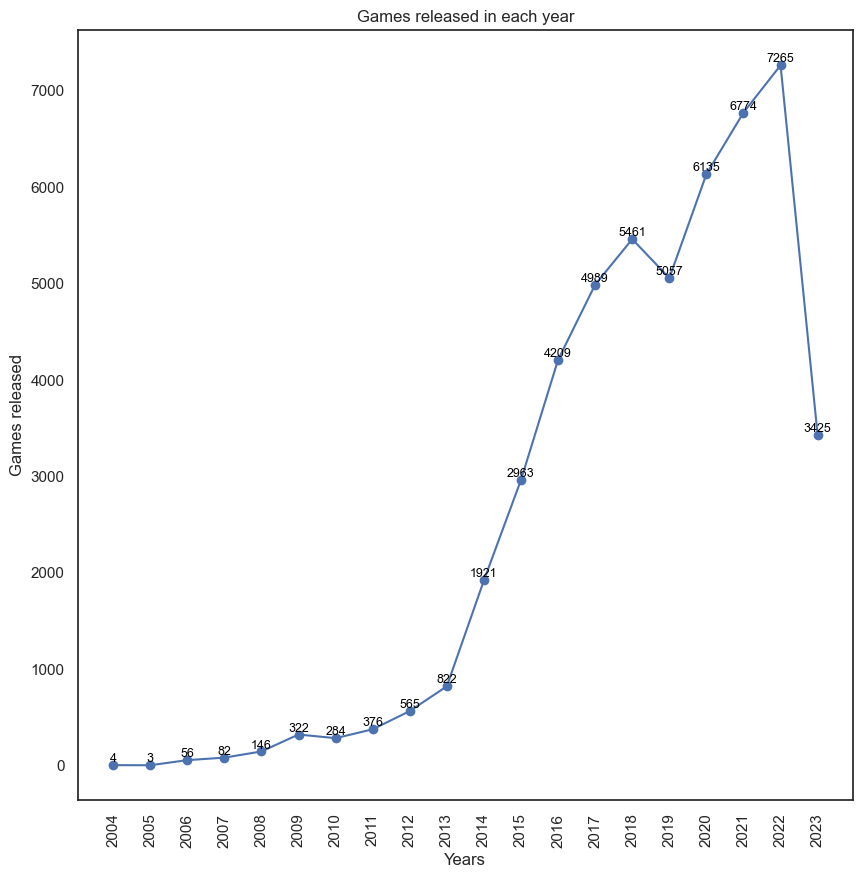

In [49]:
plt.figure(figsize=(10, 10))
plt.plot(release_year_count['year_released'], release_year_count['games_released'], 'b-o')
for i in range(20):
    plt.text(release_year_count['year_released'][i], release_year_count['games_released'][i] + 0.5, f'{release_year_count['games_released'][i]}',
    ha='center', va='bottom', fontsize=9, color='black')
plt.title("Games released in each year")
plt.xticks(release_year_count['year_released'], rotation = 90)
plt.xlabel("Years")
plt.ylabel("Games released")
plt.show()

# Got number of games released in each month and year.

In [50]:
game_index = df1.groupby('month_released')['user_reviews'].idxmax()

In [51]:
best_game_per_month = df1.loc[game_index, ['month_released', 'title', 'user_reviews']]

In [52]:
best_game_per_month = best_game_per_month.sort_values(by='month_released', ascending = True).reset_index(drop=True)

In [53]:
best_game_per_month.head(12)

,month_released,title,user_reviews
0,1,Subnautica,220337
1,2,Rust,786668
2,3,Warframe,542198
3,4,Grand Theft Auto V,1484122
4,5,Terraria,943413
5,6,Dead by Daylight,492443
6,7,Dota 2,2045628
7,8,Counter-Strike: Global Offensive,7494460
8,9,Phasmophobia,486466
9,10,Team Fortress 2,985819


In [54]:
game_ind = df1.groupby('year_released')['user_reviews'].idxmax()

In [55]:
best_game_per_year = df1.loc[game_ind, ['year_released', 'title', 'user_reviews']]

In [56]:
best_game_per_year = best_game_per_year.sort_values(by='year_released', ascending = True).reset_index(drop=True)

In [57]:
best_game_per_year = best_game_per_year.tail(20).reset_index()

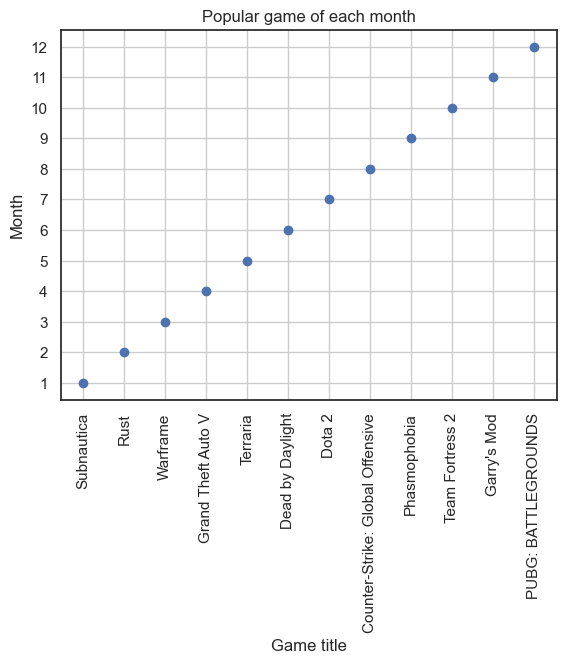

In [58]:
plt.scatter(best_game_per_month['title'], best_game_per_month['month_released'])
plt.xticks(rotation = 90)
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("Popular game of each month")
plt.xlabel("Game title")
plt.ylabel("Month")
plt.grid(True)

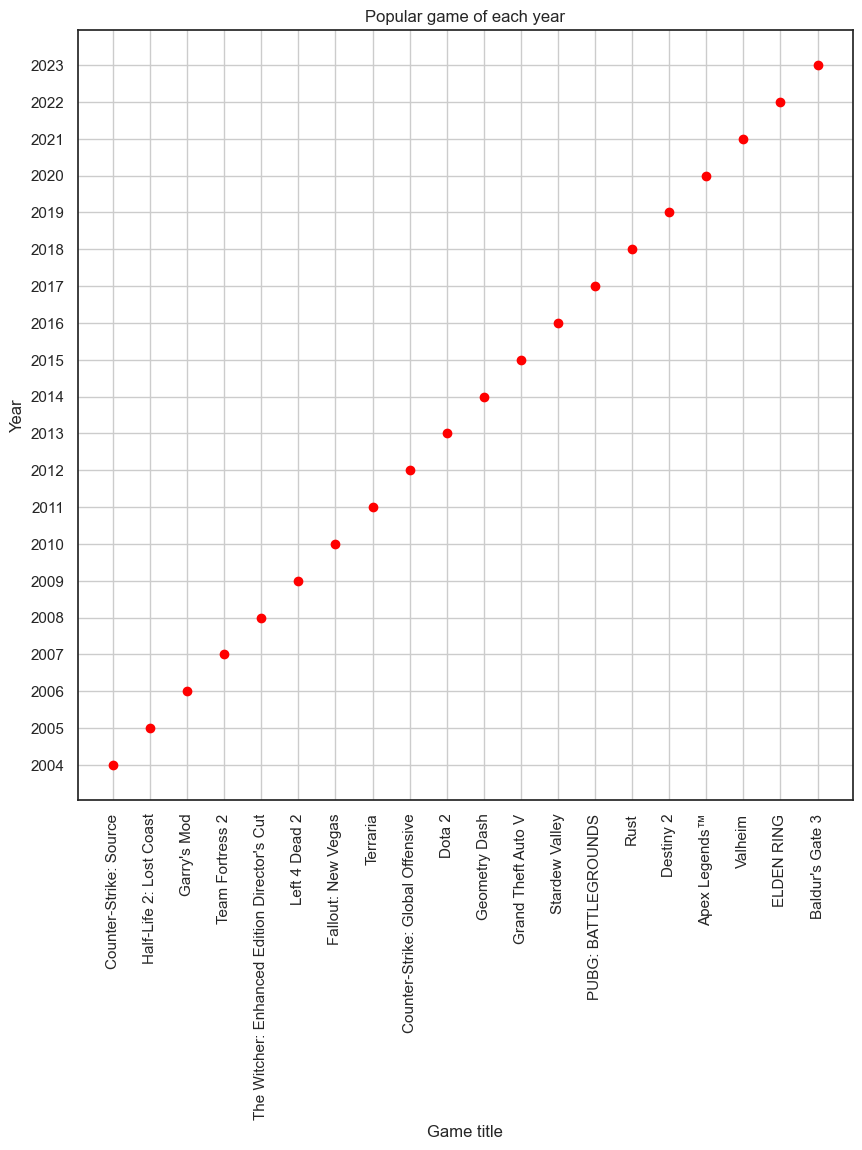

In [59]:
plt.figure(figsize=(10, 10))
plt.scatter(best_game_per_year['title'], best_game_per_year['year_released'], color = 'red')
plt.xticks(rotation = 90)
plt.yticks(best_game_per_year['year_released'])
plt.title("Popular game of each year")
plt.xlabel("Game title")
plt.ylabel("Year")
plt.grid(True)

# Got most popular game released monthly and yearly.

In [60]:
new_popular_games = df1[df1['date_release'].dt.year == 2023 ].sort_values(by = ['user_reviews', 'positive_ratio'], ascending = False)

In [61]:
new_popular_games = new_popular_games.head(20)
new_popular_games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,steam_deck,month_released,year_released
14770,1086940,Baldur's Gate 3,2023-08-03,True,True,False,Overwhelmingly Positive,95,269840,True,8,2023
48718,1468810,鬼谷八荒 Tale of Immortal,2023-05-26,True,False,False,Mixed,52,185051,True,5,2023
14286,2357570,Overwatch® 2,2023-08-10,True,False,False,Overwhelmingly Negative,9,181198,True,8,2023
48259,990080,Hogwarts Legacy,2023-02-10,True,False,False,Very Positive,92,156547,True,2,2023
48601,1326470,Sons Of The Forest,2023-02-23,True,False,False,Very Positive,83,128626,True,2,2023
48035,714010,Aimlabs,2023-06-16,True,False,False,Very Positive,93,89133,True,6,2023
15246,671860,BattleBit Remastered,2023-06-15,True,False,False,Very Positive,89,76710,True,6,2023
13576,2050650,Resident Evil 4,2023-03-23,True,False,False,Overwhelmingly Positive,97,55455,True,3,2023
12751,1868140,DAVE THE DIVER,2023-06-28,True,True,False,Overwhelmingly Positive,97,51463,True,6,2023
13846,1049590,Eternal Return,2023-07-19,True,False,False,Mostly Positive,78,49560,True,7,2023


C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39740 (\N{CJK UNIFIED IDEOGRAPH-9B3C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35895 (\N{CJK UNIFIED IDEOGRAPH-8C37}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20843 (\N{CJK UNIFIED IDEOGRAPH-516B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33618 (\N{CJK UNIFIED IDEOGRAPH-8352}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


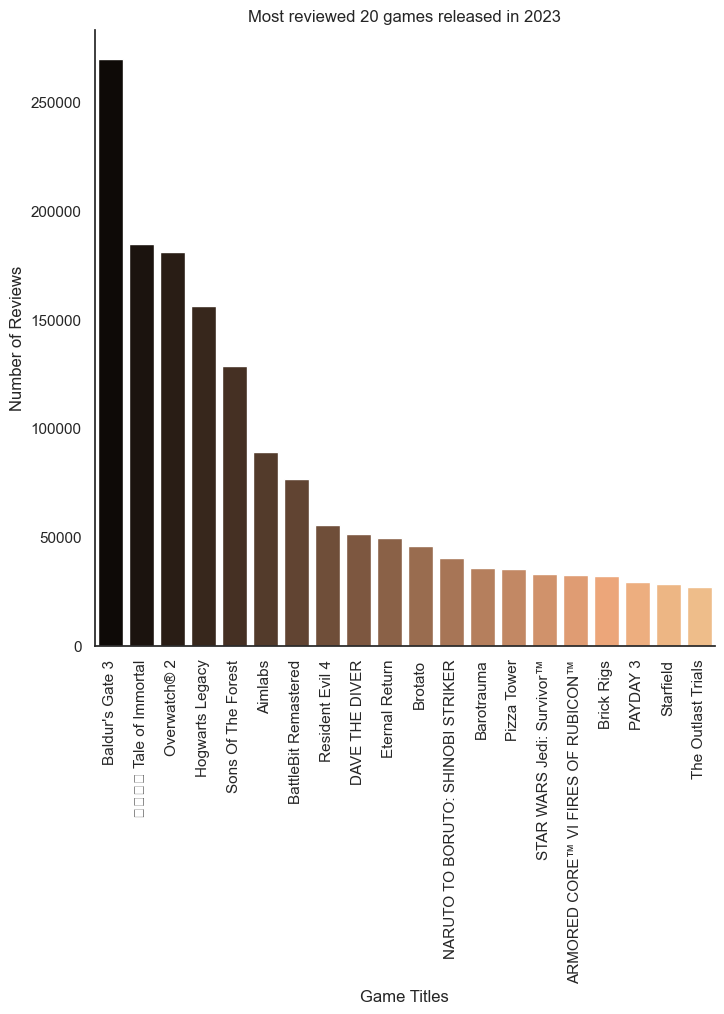

In [62]:
sns.set(style="white", context="notebook")
fig2, ax2 = plt.subplots(figsize=(8, 8))
sns.barplot(new_popular_games, x = "title", y = "user_reviews", hue = "title", legend = False, palette="copper", ax=ax2)
ax2.set_title("Most reviewed 20 games released in 2023")
ax2.set_ylabel("Number of Reviews")
ax2.set_xlabel("Game Titles")
plt.xticks(rotation=90)
sns.despine()
plt.show()

# Got top popular games released in 2023.

In [63]:
new_liked_games = df1[(df1['date_release'].dt.year == 2023) & (df1['positive_ratio'] >= 90) & (df1['rating'] == 'Overwhelmingly Positive')].sort_values(by = ['user_reviews', 'positive_ratio'], ascending = False)

In [64]:
new_liked_games = new_liked_games.head(20)

In [65]:
new_disliked_games = df1[(df1['date_release'].dt.year == 2023) & (df1['positive_ratio'] <= 50) & (df1['rating'].isin(['Overwhelmingly Negative', 'Negative','Mostly Negative']))].sort_values(by = ['user_reviews', 'positive_ratio'], ascending = False)

In [66]:
new_disliked_games = new_disliked_games.head(20)

In [67]:
disliked_games = df1[(df1['positive_ratio'] <= 50) & (df1['rating'].isin(['Overwhelmingly Negative', 'Negative','Mostly Negative']))].sort_values(by = ['user_reviews', 'positive_ratio'], ascending = False)

In [68]:
disliked_games = disliked_games.head(20)

C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19996 (\N{CJK UNIFIED IDEOGRAPH-4E1C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22799 (\N{CJK UNIFIED IDEOGRAPH-590F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


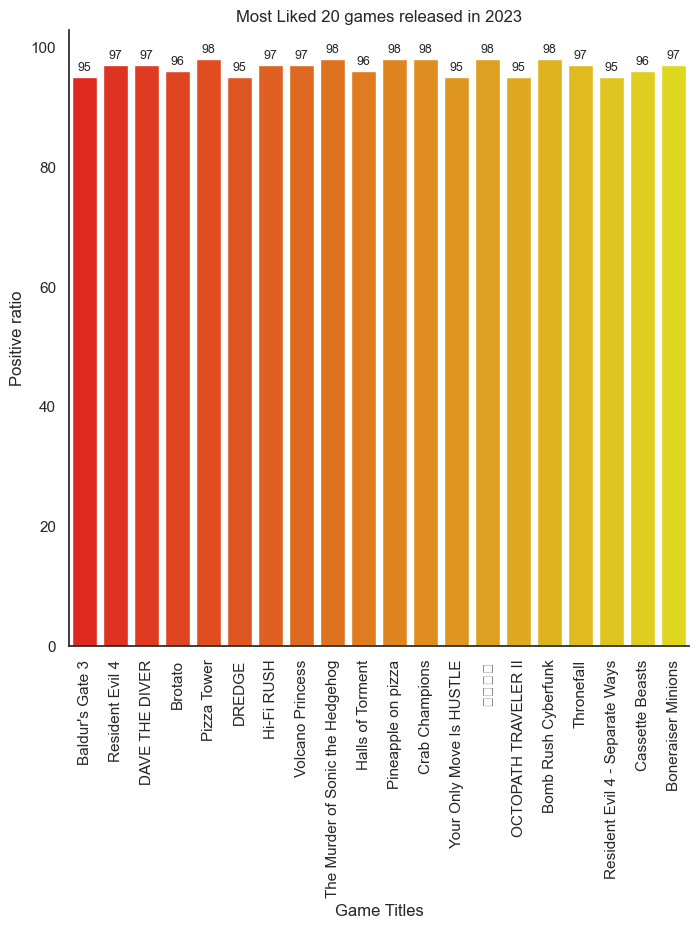

In [69]:
sns.set(style="white", context="notebook")
fig2, ax2 = plt.subplots(figsize=(8, 8))
sns.barplot(new_liked_games, x = "title", y = "positive_ratio", hue = "title", legend = False, palette="autumn", ax=ax2)
ax2.set_title("Most Liked 20 games released in 2023")
ax2.set_ylabel("Positive ratio")
ax2.set_xlabel("Game Titles")
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)
plt.xticks(rotation=90)
sns.despine()
plt.show()

C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27743 (\N{CJK UNIFIED IDEOGRAPH-6C5F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28246 (\N{CJK UNIFIED IDEOGRAPH-6E56}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21313 (\N{CJK UNIFIED IDEOGRAPH-5341}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


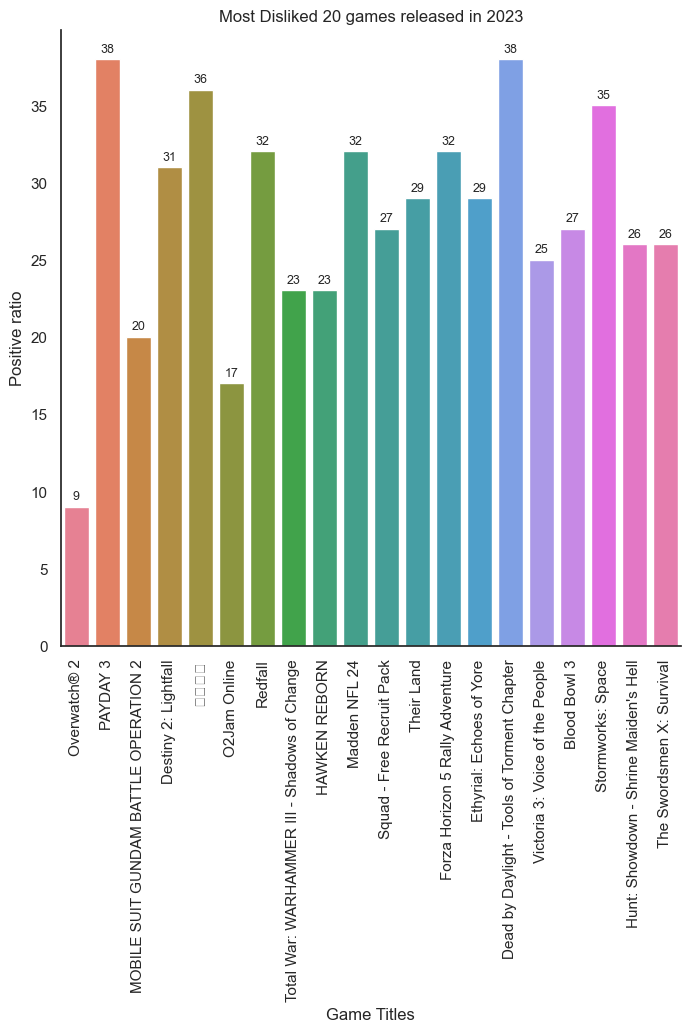

In [70]:
sns.set(style="white", context="notebook")
fig3, ax3 = plt.subplots(figsize=(8, 8))
sns.barplot(new_disliked_games, x = "title", y = "positive_ratio", hue = "title", legend = False, ax=ax3)
ax3.set_title("Most Disliked 20 games released in 2023")
ax3.set_ylabel("Positive ratio")
ax3.set_xlabel("Game Titles")
plt.xticks(rotation=90)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)
sns.despine()
plt.show()

C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27743 (\N{CJK UNIFIED IDEOGRAPH-6C5F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28246 (\N{CJK UNIFIED IDEOGRAPH-6E56}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21313 (\N{CJK UNIFIED IDEOGRAPH-5341}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


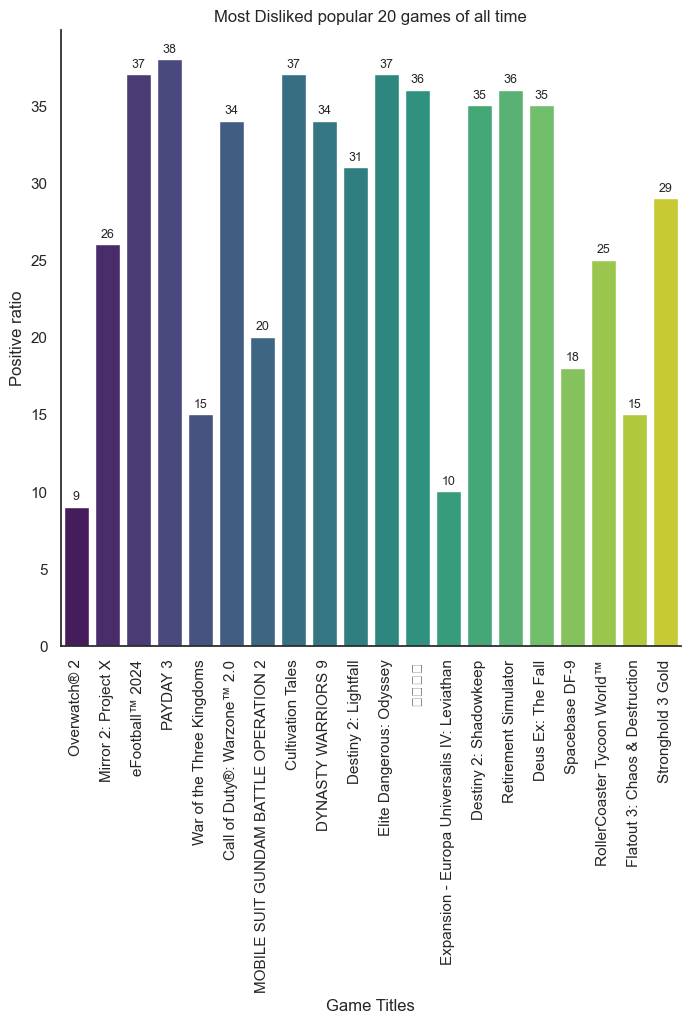

In [71]:
sns.set(style="white", context="notebook")
fig4, ax4 = plt.subplots(figsize=(8, 8))
sns.barplot(disliked_games, x = "title", y = "positive_ratio", hue = "title", legend = False, palette="viridis", ax=ax4)
ax4.set_title("Most Disliked popular 20 games of all time")
ax4.set_ylabel("Positive ratio")
ax4.set_xlabel("Game Titles")
plt.xticks(rotation=90)
for container in ax4.containers:
    ax4.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)
sns.despine()
plt.show()

# Got top liked and disliked games in 2023 & overall top disliked games.